# AMES Housing Data


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Description txt file for the raw data

In [39]:
with open('Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [40]:
df =pd.read_csv('Ames_Housing_Data.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### Correlation between the features and sales 

In [42]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:>

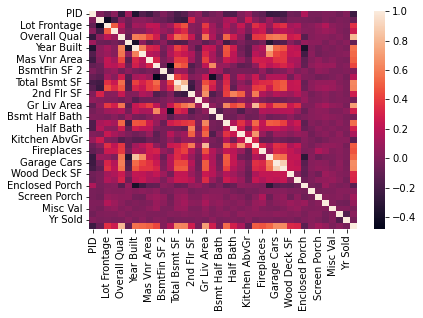

In [43]:
sns.heatmap(df.corr())

### Sales Distribution

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

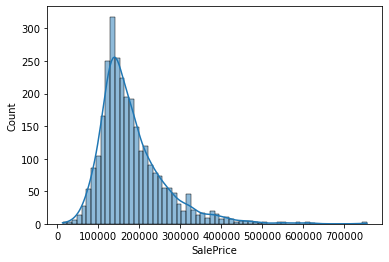

In [44]:
sns.histplot(df["SalePrice"],kde=True)

### Relation between Sales and Gr Liv Area / Overall Qual (Highest correlation)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

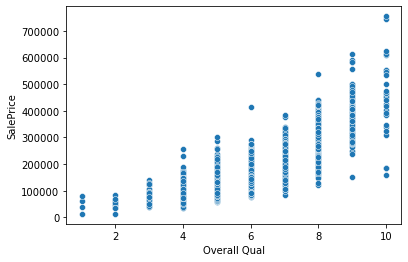

In [45]:
sns.scatterplot(data=df,x='Overall Qual',y='SalePrice')

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

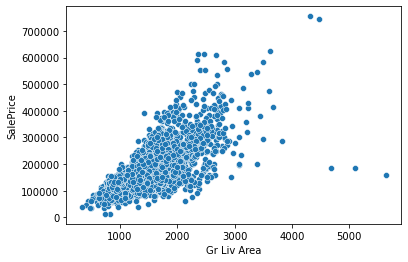

In [46]:
sns.scatterplot(data=df,x='Gr Liv Area',y='SalePrice')

### Removing 3 outliers using the above data


In [47]:
drop_index=df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] <200000)].index

In [48]:
df = df.drop(drop_index,axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

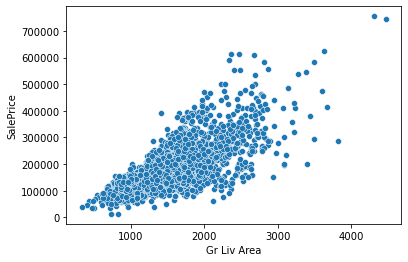

In [49]:
sns.scatterplot(data=df,x='Gr Liv Area',y='SalePrice')

## Feature Engineering
### 1. Dropping PID column 
### 2 . Cheking for percentage of null values


In [50]:
df = df.drop('PID', axis =1)

In [51]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2915
Misc Feature    2822
Alley           2729
Fence           2355
Fireplace Qu    1422
                ... 
Heating QC         0
MS Zoning          0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 80, dtype: int64

In [52]:
def percent_missing(x):
    percent_nan = ((100* x.isnull().sum()) /len(x)) 
    percent_nan = percent_nan[percent_nan >0].sort_values(ascending=False)
    return percent_nan
    

In [53]:
percent_null =percent_missing(df)
percent_null

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
BsmtFin SF 1       0.034165
Electrical         0.034165
dtype: float64

### Filtering null values less than 1 percent

(0.0, 1.0)

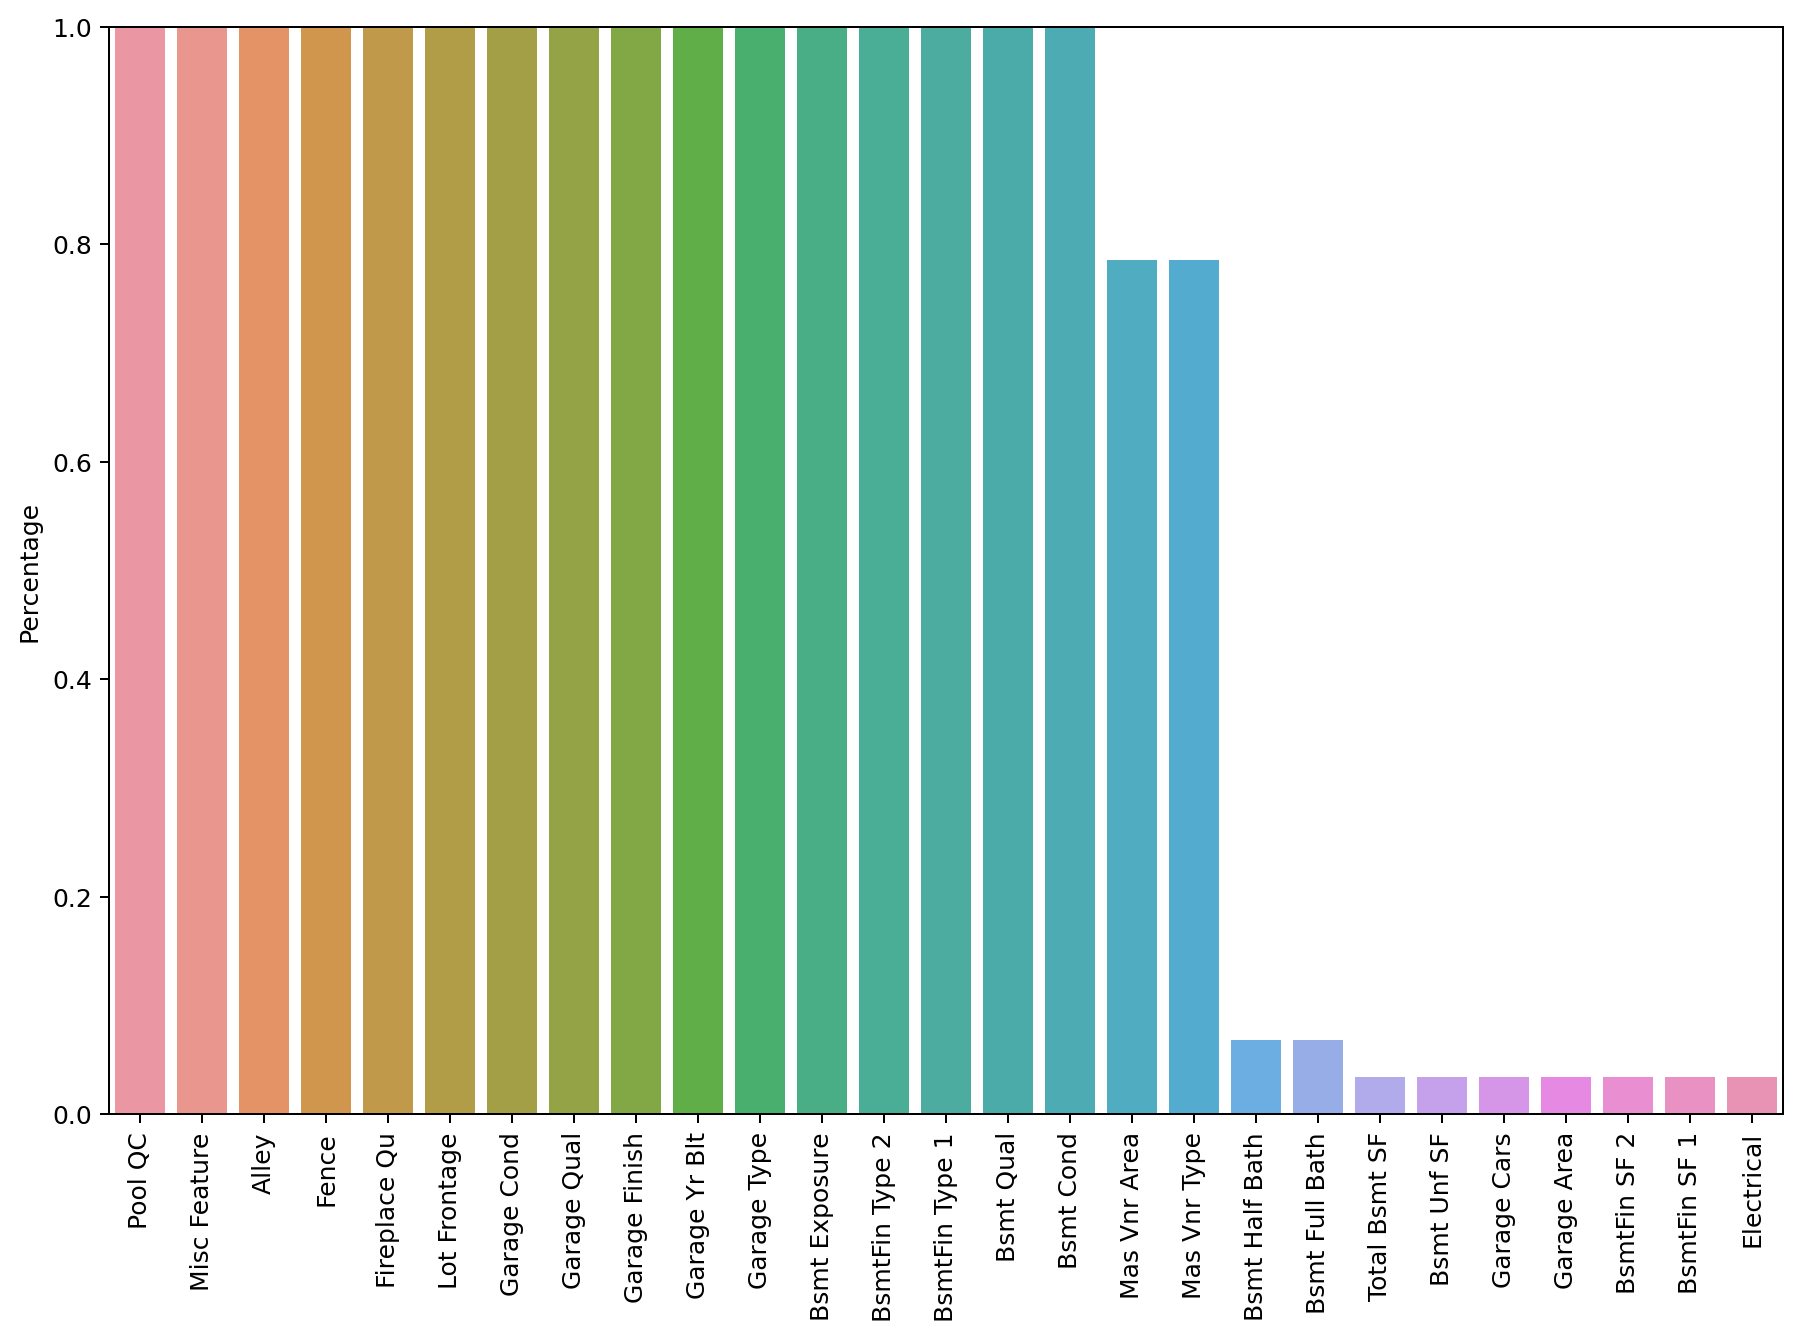

In [54]:
plt.figure(figsize=(12,8),dpi=180)
sns.barplot(x=percent_null.index,y=percent_null)
plt.xticks(rotation=90);
plt.ylabel('Percentage')
plt.ylim(0,1)

In [55]:
percent_null[percent_null <1]

Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Garage Cars       0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
BsmtFin SF 1      0.034165
Electrical        0.034165
dtype: float64

### Dropping null rows in Electrical and Garage Cars

In [56]:
df =df.dropna(axis = 0, subset=['Electrical','Garage Cars'])

In [57]:
percent_null =percent_missing(df)
percent_null[percent_null<1]

Mas Vnr Area      0.786325
Mas Vnr Type      0.786325
Bsmt Half Bath    0.068376
Bsmt Full Bath    0.068376
Bsmt Unf SF       0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Total Bsmt SF     0.034188
dtype: float64

### Filling string as 'None' for string columns and 0 for INT values as they do have the features in the house

In [58]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [59]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [60]:
#BSMT Numeric Coloumns--> fill na

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

#BSMT STRING Columns
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [61]:
percent_null =percent_missing(df)
percent_null[percent_null<1]


Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

(0.0, 1.0)

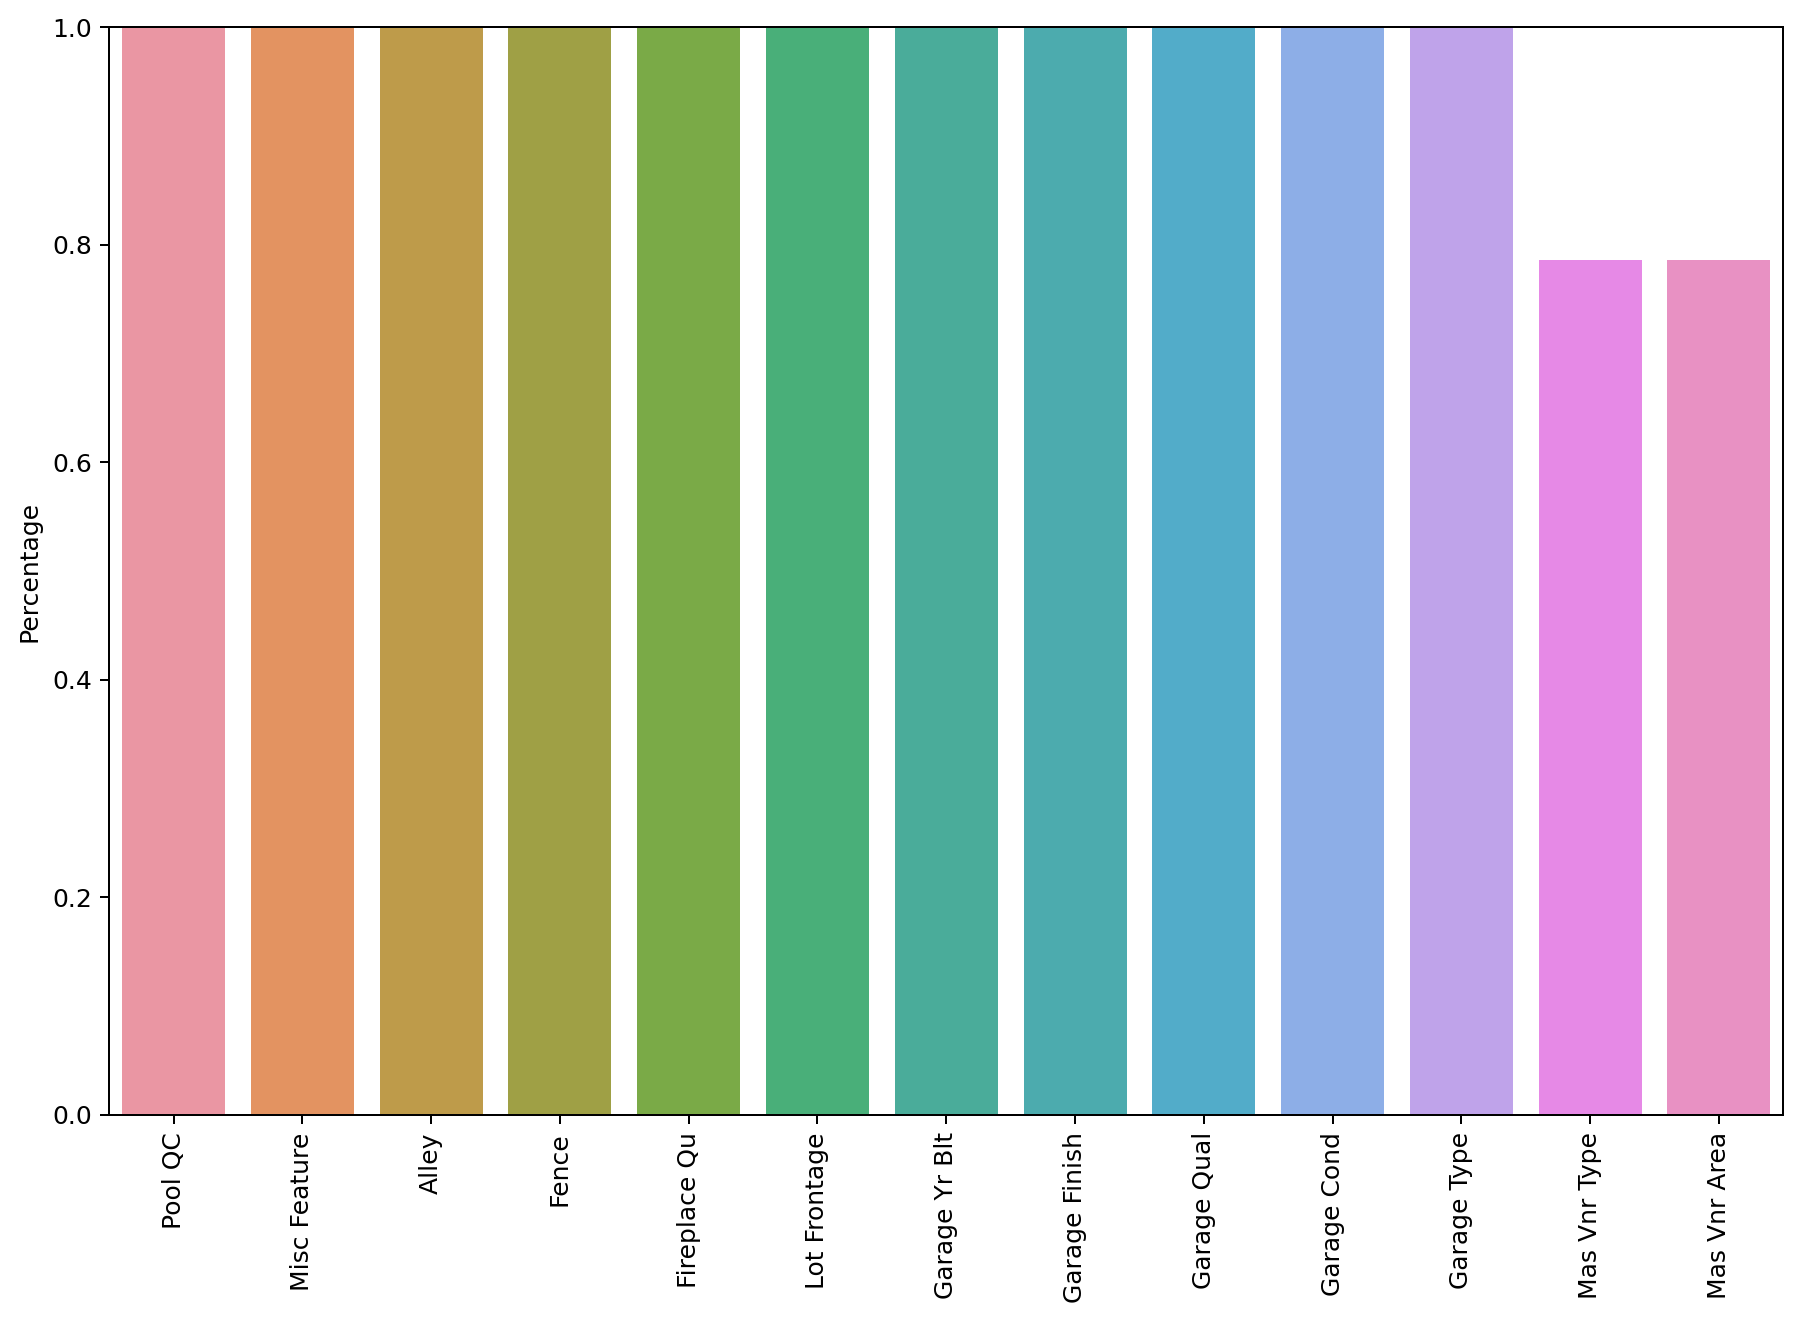

In [62]:
plt.figure(figsize=(12,8),dpi=180)
sns.barplot(x=percent_null.index,y=percent_null)
plt.xticks(rotation=90);
plt.ylabel('Percentage')
plt.ylim(0,1)

In [63]:
df[df['Mas Vnr Type'].isnull()][['Mas Vnr Type','Mas Vnr Area']]

,Mas Vnr Type,Mas Vnr Area
55,NaN,NaN
484,NaN,NaN
517,NaN,NaN
538,NaN,NaN
867,NaN,NaN
1095,NaN,NaN
1119,NaN,NaN
1122,NaN,NaN
1127,NaN,NaN
1184,NaN,NaN


In [64]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [65]:
percent_null =percent_missing(df)
percent_null[percent_null<10]


Garage Yr Blt    5.401709
Garage Finish    5.401709
Garage Qual      5.401709
Garage Cond      5.401709
Garage Type      5.367521
dtype: float64

Text(0, 0.5, 'Percentage')

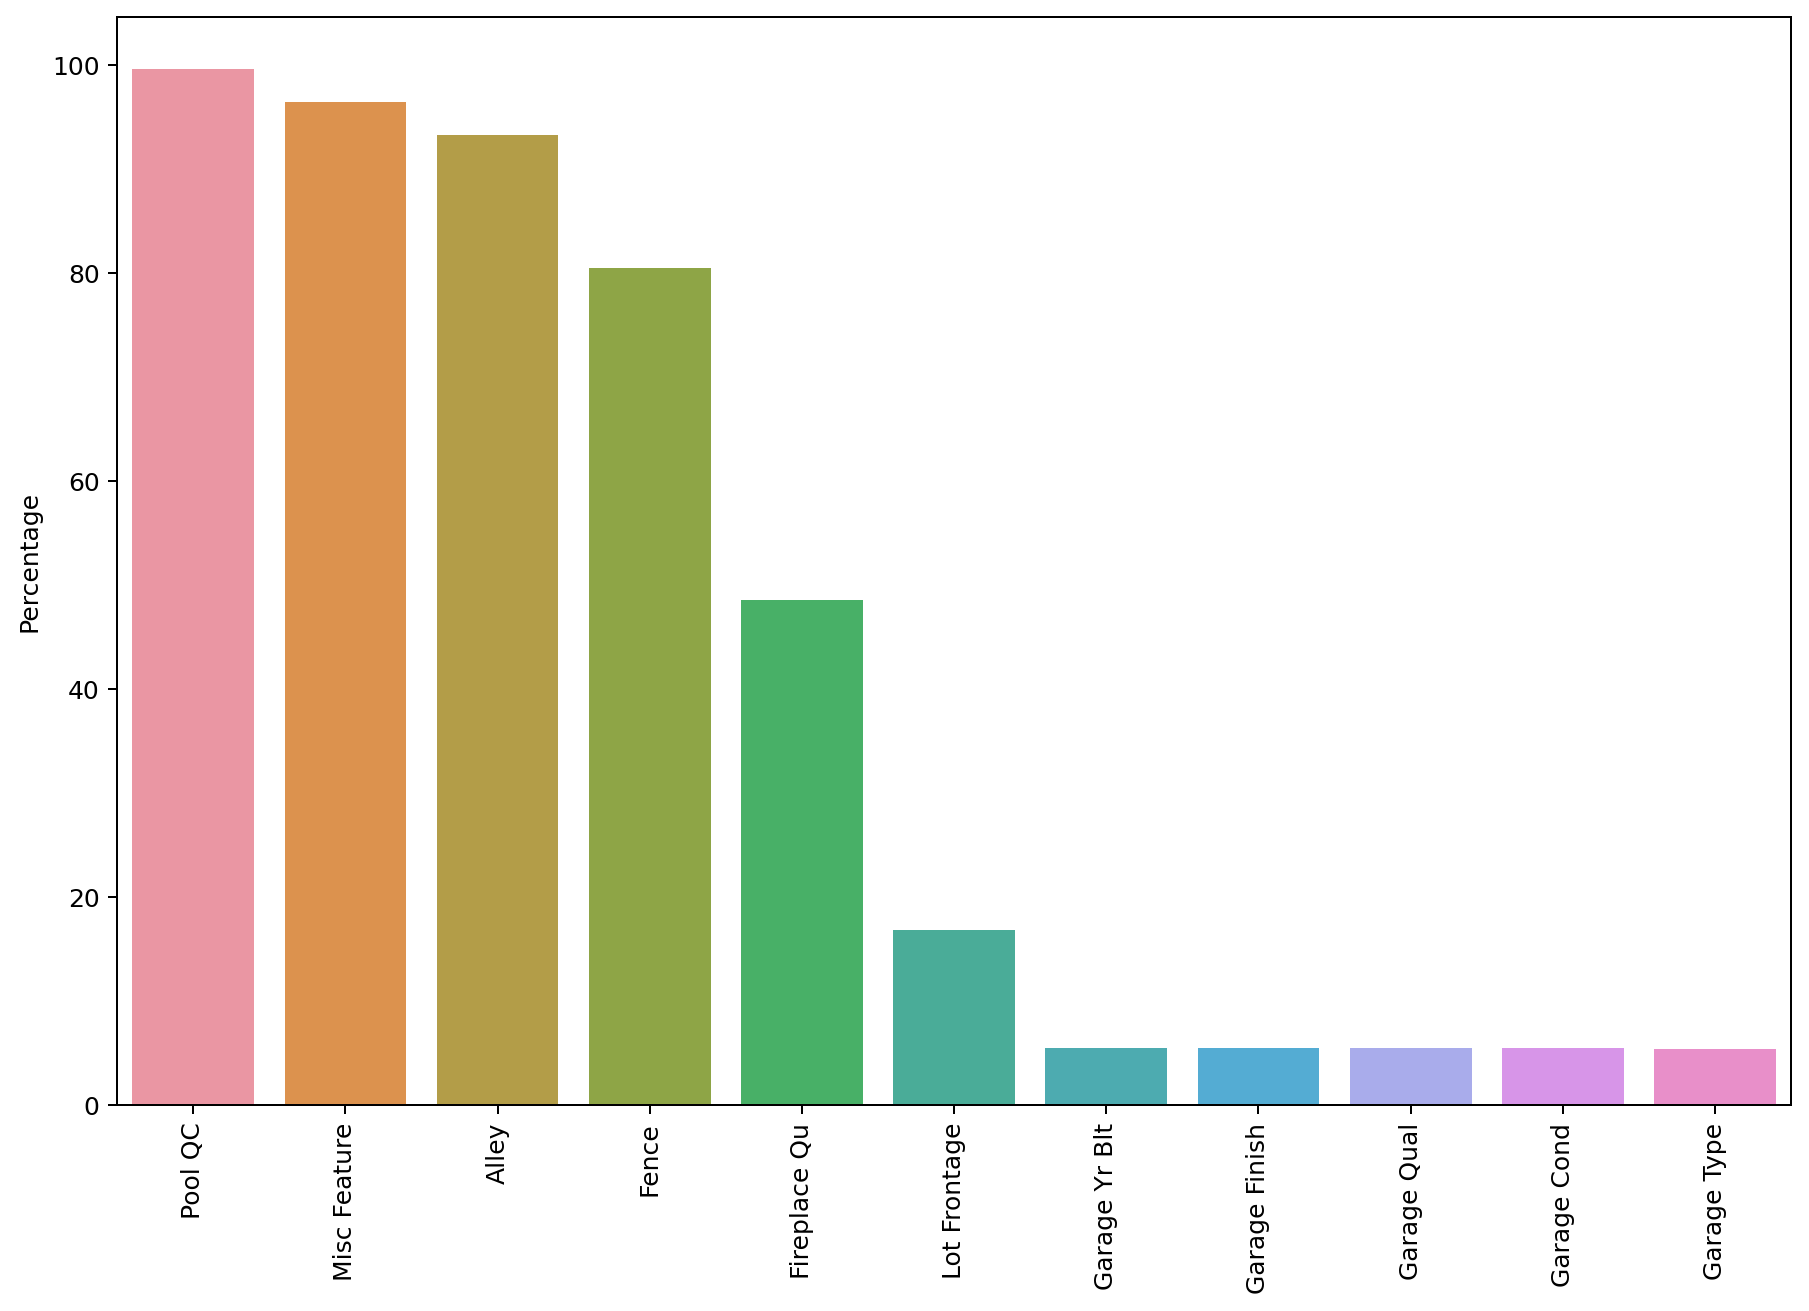

In [66]:
plt.figure(figsize=(12,8),dpi=180)
sns.barplot(x=percent_null.index,y=percent_null)
plt.xticks(rotation=90);
plt.ylabel('Percentage')


In [67]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [68]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [69]:
percent_null =percent_missing(df)
percent_null


Pool QC         99.589744
Misc Feature    96.410256
Alley           93.230769
Fence           80.478632
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

### Dropping the other columns except Lot Frontage and using string as 'None' and INT as 0 for Fireplace Qu

In [70]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)


In [71]:
percent_null =percent_missing(df)
percent_null

Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

In [72]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [73]:
df['Fireplace Qu']= df['Fireplace Qu'].fillna('None')

In [74]:
percent_null =percent_missing(df)
percent_null


Lot Frontage    16.752137
dtype: float64

### Using mean Lot Frontage values based on their Neighborhood

In [39]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

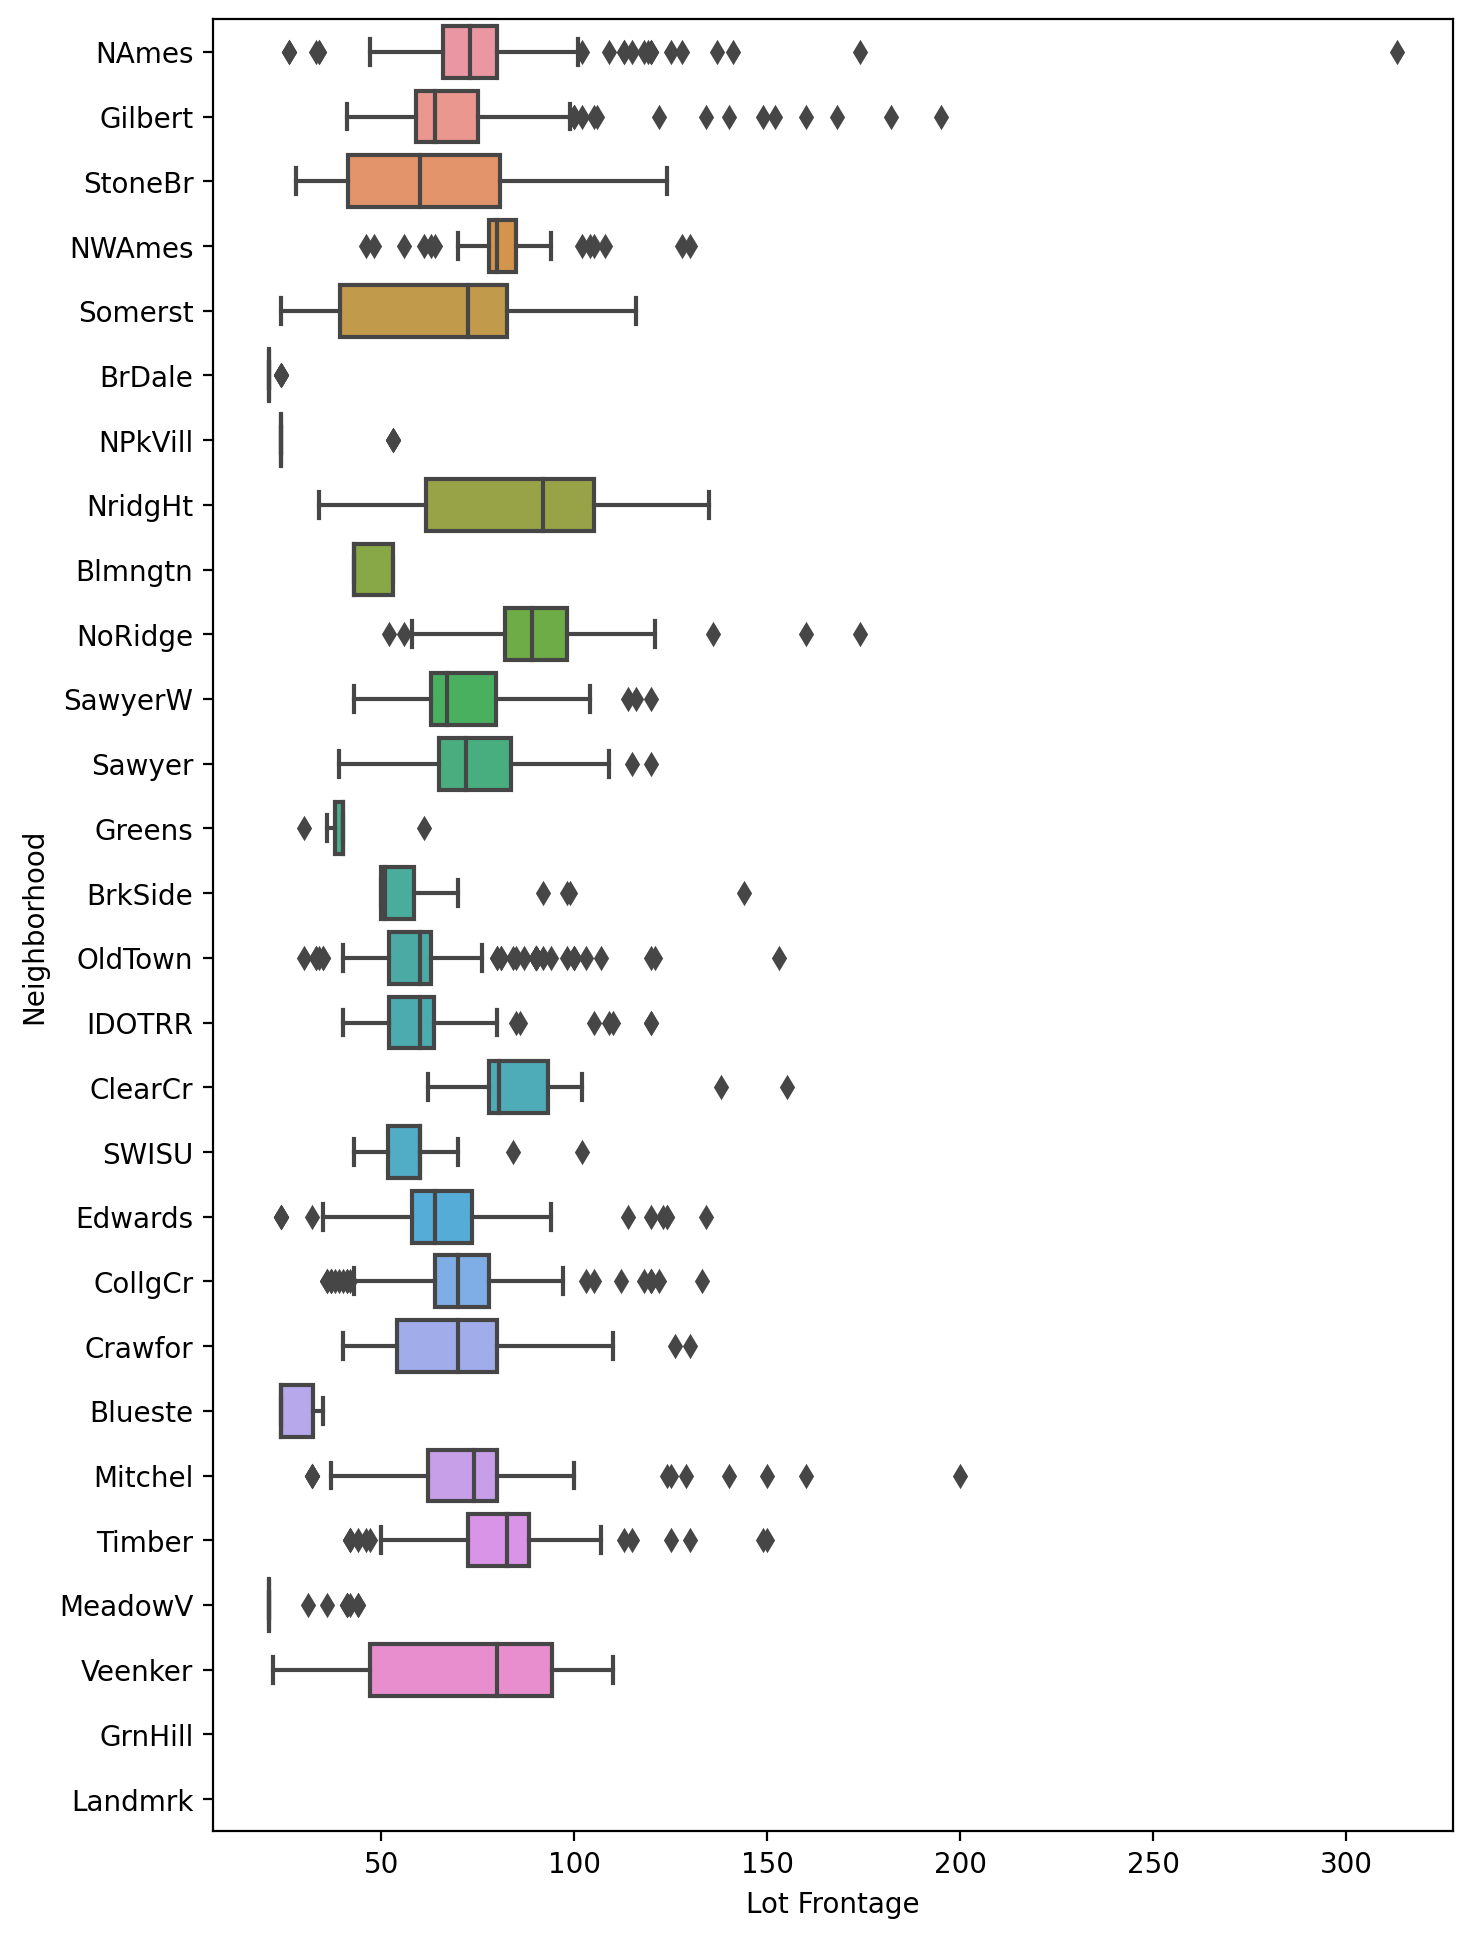

In [40]:
plt.figure(figsize=(8,12),dpi=200)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [41]:
df[df['Lot Frontage'].isnull()]['Lot Frontage']

11     NaN
14     NaN
22     NaN
23     NaN
24     NaN
        ..
2894   NaN
2897   NaN
2898   NaN
2912   NaN
2926   NaN
Name: Lot Frontage, Length: 490, dtype: float64

In [42]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].apply(lambda x: x.fillna(x.mean()))

In [43]:
percent_null =percent_missing(df)
percent_null


Lot Frontage    0.102564
dtype: float64

In [44]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [45]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [46]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

### Converting MS Subclass to string

In [47]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

### 1. Splitting the Data Frame into String and Numberic Data Frame
### 2. Getting dummies for the object dataframe
### 3. Concatenating the new object data frame and numberic data frame to perform Linear Regression

In [48]:
my_object_df = df.select_dtypes(include='object')

In [49]:
my_numeric_df = df.select_dtypes(exclude='object')

In [50]:
df_objects_dummies = pd.get_dummies(my_object_df,drop_first=True)

In [51]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [52]:
final_df = pd.concat([my_numeric_df,df_objects_dummies], axis=1)

In [53]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

## Linear Regession using ElasticNet

In [60]:
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=40)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import ElasticNet

In [71]:
base_elastic_model = ElasticNet(max_iter=1000000)

In [72]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [75]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [76]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [77]:
y_pred = grid_model.predict(scaled_X_test)

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [79]:
mean_absolute_error(y_test,y_pred)

13961.144876249458

In [80]:
np.sqrt(mean_squared_error(y_test,y_pred))

20859.346978386147

In [81]:
np.mean(df['SalePrice'])

180815.53743589742